# Ford Gobike Bike Sharing Data Analysis
   by Abdelrahman Mohsen
   
## Preliminary Wrangling
We explore the bike sharing data with more than 150 thousand entries

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Data Assessment

In [2]:
#load dataset to pandas datafreame
df = pd.read_csv('tripdata.csv')

In [3]:
#overview of the dataset content
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.shape

(183412, 16)

In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

### Structure of the dataset

Our dataset contains more than 13 thousand rows and 16 attributes of bike sharing system like trip duration, station name etc..
As shown in the above cell we can see that the structure of the dataset need some modifications, the time need to be converted to datetime, also build a new column for age that can be got from birth year

### The main features of interest 

I'm interested in gender, what the distinction in riding behaviours between men and women.
there are several features that might support our analysis like duration, user type, stations names and birth year

### Data Cleaning

In [7]:
#keep only feamle or male in gender column
df = df.loc[df["member_gender"] != 'Other']

In [8]:
# convert the Start Time column to datetime
df['start_time'] = pd.to_datetime(df['start_time'])

# extract year, month and hour from Start Time to create new columns
df['year'] = df['start_time'].apply(lambda time: time.year)
df['start_month'] = df['start_time'].apply(lambda time: time.month)
df['start_hour'] = df['start_time'].apply(lambda time: time.hour)

#drop start time column
df.drop(columns='start_time',inplace=True)

In [9]:
# convert the Start Time column to datetime
df['end_time'] = pd.to_datetime(df['end_time'])

# extract year, month and hour from Start Time to create new columns
df['end_year'] = df['end_time'].apply(lambda time: time.year)
df['end_month'] = df['end_time'].apply(lambda time: time.month)
df['end_hour'] = df['end_time'].apply(lambda time: time.hour)

#drop end time column
df.drop(columns='end_time',inplace=True)

In [10]:
#convert duration to minutes
df['duration']=df['duration_sec']/60
df.drop(columns='duration_sec',inplace=True)

In [11]:
#calculate member age
df['member_age'] = df['year'] - df['member_birth_year']

In [12]:
# remove Nan values in gender and age
df.dropna(subset=['member_gender','member_age'],inplace=True)

In [13]:
# create day period column 
df['period'] = 'Morning'
df['period'][(df['start_hour'] >= 12) & (df['start_hour'] <= 17)] = 'Afternoon'
df['period'][(df['start_hour'] >= 18) & (df['start_hour'] <= 23)] = 'Night'

<ipython-input-13-a1ad0470b9f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['period'][(df['start_hour'] >= 12) & (df['start_hour'] <= 17)] = 'Afternoon'
<ipython-input-13-a1ad0470b9f3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['period'][(df['start_hour'] >= 18) & (df['start_hour'] <= 23)] = 'Night'


In [14]:
df.period.value_counts()

Morning      66162
Afternoon    65678
Night        39655
Name: period, dtype: int64

In [15]:
#test 
df.dtypes

start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
year                         int64
start_month                  int64
start_hour                   int64
end_year                     int64
end_month                    int64
end_hour                     int64
duration                   float64
member_age                 float64
period                      object
dtype: object

In [16]:
#test
df.head()

,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,...,bike_share_for_all_trip,year,start_month,start_hour,end_year,end_month,end_hour,duration,member_age,period
0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,...,No,2019,2,17,2019,3,8,869.750000,35.0,Afternoon
2,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,...,No,2019,2,12,2019,3,5,1030.900000,47.0,Afternoon
4,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,...,Yes,2019,2,23,2019,3,0,26.416667,45.0,Night
5,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,...,No,2019,2,23,2019,3,0,29.883333,60.0,Night
6,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,...,No,2019,2,23,2019,3,0,19.116667,36.0,Night


## Univariate Exploration


Text(0.5, 1.0, 'Gender Count')

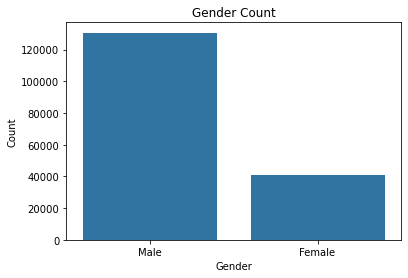

In [17]:
#which type of gender ride bikes more 
#look at gender distribution to find out
sb.countplot(data = df, x = 'member_gender', color = sb.color_palette()[0])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Count')

As shown from the plot that no. of males is triple the no. of females,this expected because of the high physical strength required for such activity, but on the other hand the no. of females is quite high which is interested to investigate more

Text(0.5, 1.0, 'Age Distribution')

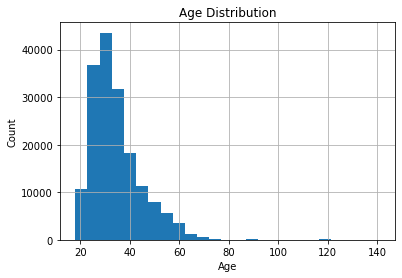

In [18]:
#show age distribution
df.member_age.hist(bins=25)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

It's intersting to find out that the most ages that frequently use bike are between late twenties and early thirties, also more than 10 people who ages exceed 75 ride bikes, the people with age over than 100 might be outliers.
This might indicate that the service is used for work delivery not sport activity.

Text(0.5, 1.0, 'Trips distribution along day period ')

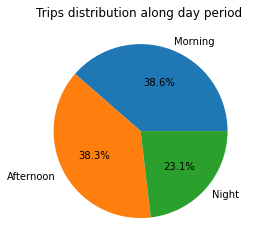

In [19]:
#let's find which day period has more trips 
df_p = df.period.value_counts()
labels = 'Morning','Afternoon','Night'

plt.pie(df_p,labels=labels, autopct='%1.1f%%')
plt.title('Trips distribution along day period ')

Morning and afternoon is close to each other while night is the least one but is not far from them,
this might emphazise on the insght we think of that the service is used mainly for work delivery, next we will show the duartion to investigate more 

Text(0.5, 1.0, 'Duration Distribution')

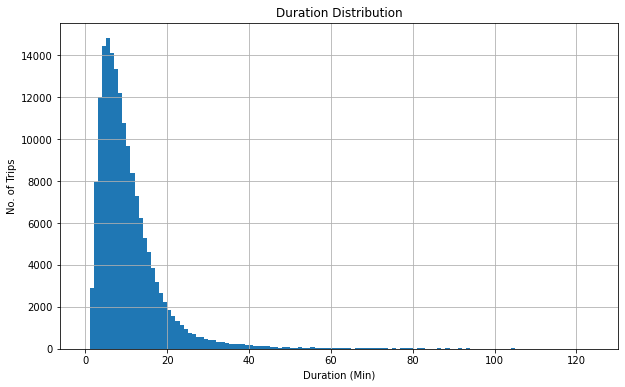

In [20]:
#show duration distribution
plt.figure(figsize=(10,6))
df.duration.hist(bins=np.arange(0, 125, 1))
plt.xlabel('Duration (Min)')
plt.ylabel('No. of Trips')
plt.title('Duration Distribution')

Most of the trips duration is small and lays between 5 to 20 minutes, this a proof that people don't use the service mainly sport but reach destinations.

## Bivariate Exploration

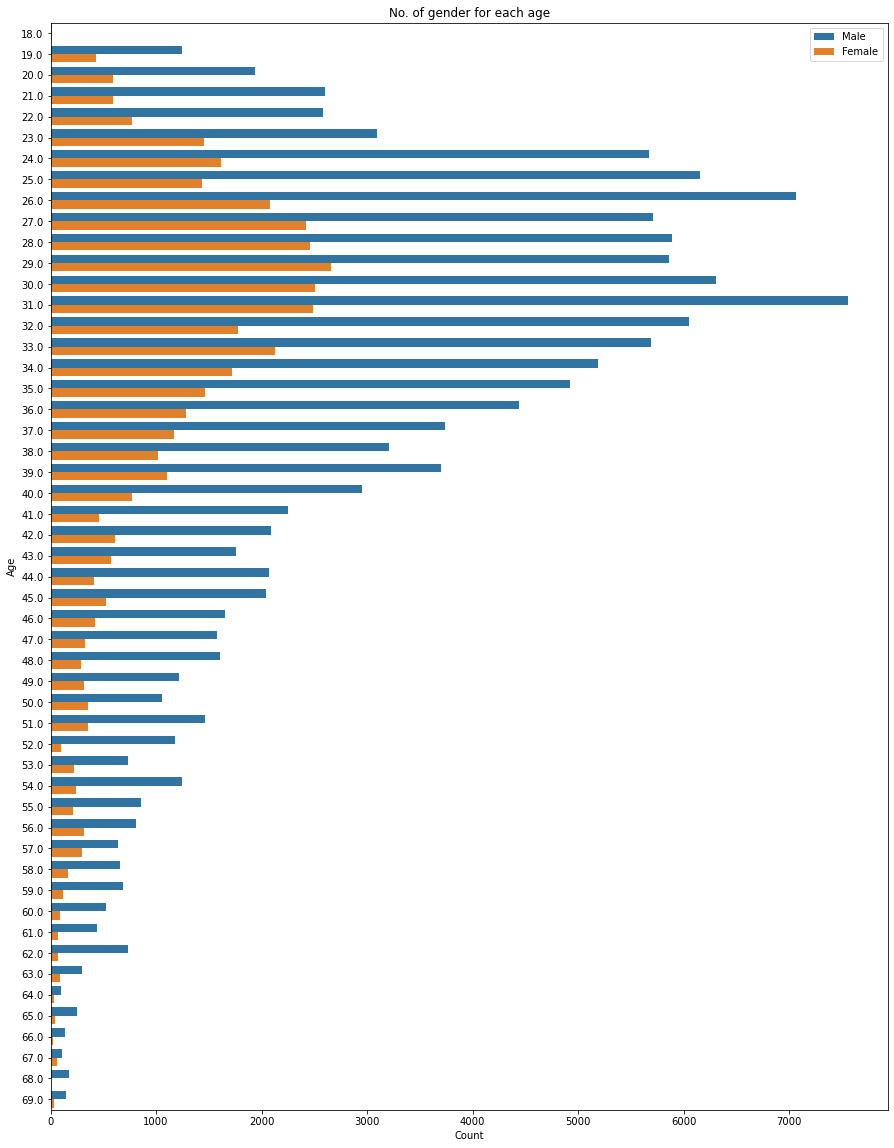

In [21]:
#what the age of males and females are use bikes more
# plot age with gender

#limit the plot to ages that under 70
df1 = df[df['member_age']<70]
plt.figure(figsize=(15,20))
sb.countplot(y="member_age", hue="member_gender", data=df1)
plt.xlabel('Count')
plt.ylabel('Age')
plt.title('No. of gender for each age')
plt.legend(['Male','Female'])

Males and Females show nearly the same age distribution, with a peak between late twenties and early thirties, also along all ages male no. always exceeds the female no.

Text(0.5, 1.0, 'Gender Distribution over Duration')

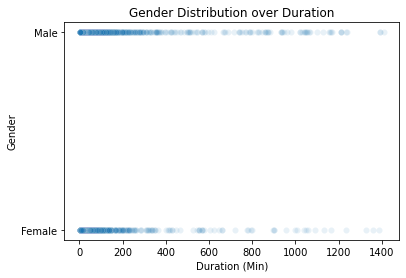

In [22]:
#How gender affect the ride duration
#plot the relation between gender and trip duration
sb.scatterplot(data=df, y='member_gender', x='duration', alpha = 0.1)
plt.xlabel('Duration (Min)')
plt.ylabel('Gender')
plt.title('Gender Distribution over Duration')

Very intersting to find out that many women have rides that exceed duration of 13 hours, this indicates that gender is not a barrier to doing activities that require high stamina or physical strength 

Text(0.5, 1.0, 'Age Relation with Duration')

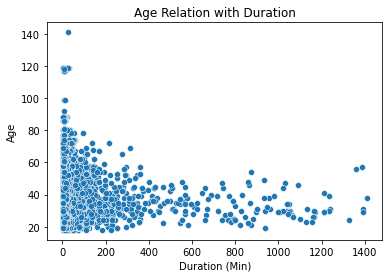

In [23]:
#How age affect the ride duration
#plot the relation between age and trip duration
sb.scatterplot(data=df, y='member_age', x='duration')
plt.xlabel('Duration (Min)')
plt.ylabel('Age')
plt.title('Age Relation with Duration')

The age of riders that take long trips are between 23 to 45, next we will investigate the age, duration and gender to deep our understanding about the relation between them

## Multivariate Exploration

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


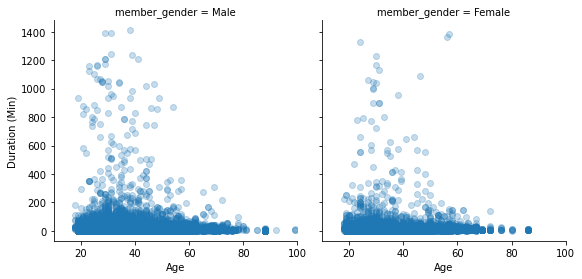

In [24]:
#How age of each gender affect the trip duration 
genders = sb.FacetGrid(data = df, col = 'member_gender',size=4, xlim = [10, 100])
genders.map(plt.scatter, 'member_age', 'duration', alpha=0.25)
genders.set_xlabels('Age')
genders.set_ylabels('Duration (Min)')
genders.add_legend()

As shown in the figure the range of male ages that ride for long time is higher than female, you can find 50 years man who ride a bike for 900 minute.
For women the range of ages that take long rides are between 25 and 35, in other hand the rande for men is wider and between 25 and 55, this means that men are more likely to perserve physical strength  while they get old.

Text(0.5, 1.0, 'The Preferable Day period Relation With Male Age')

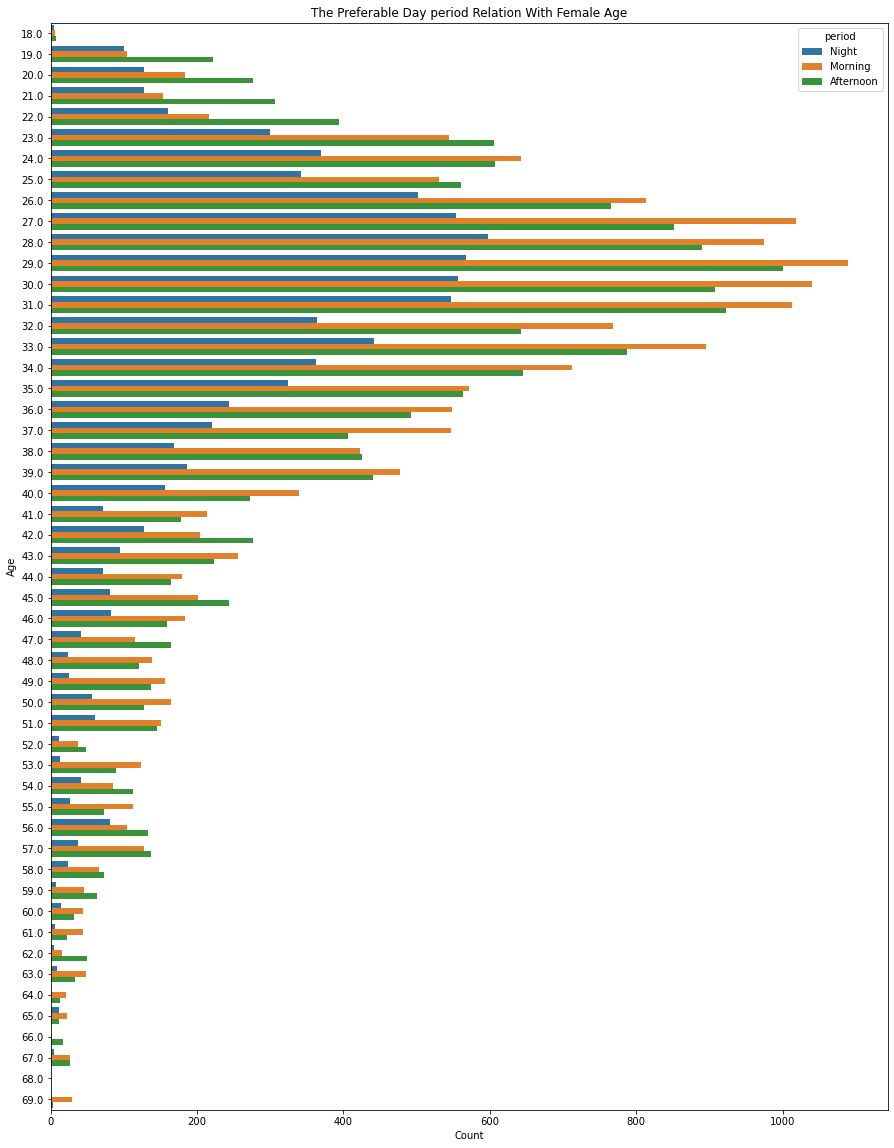

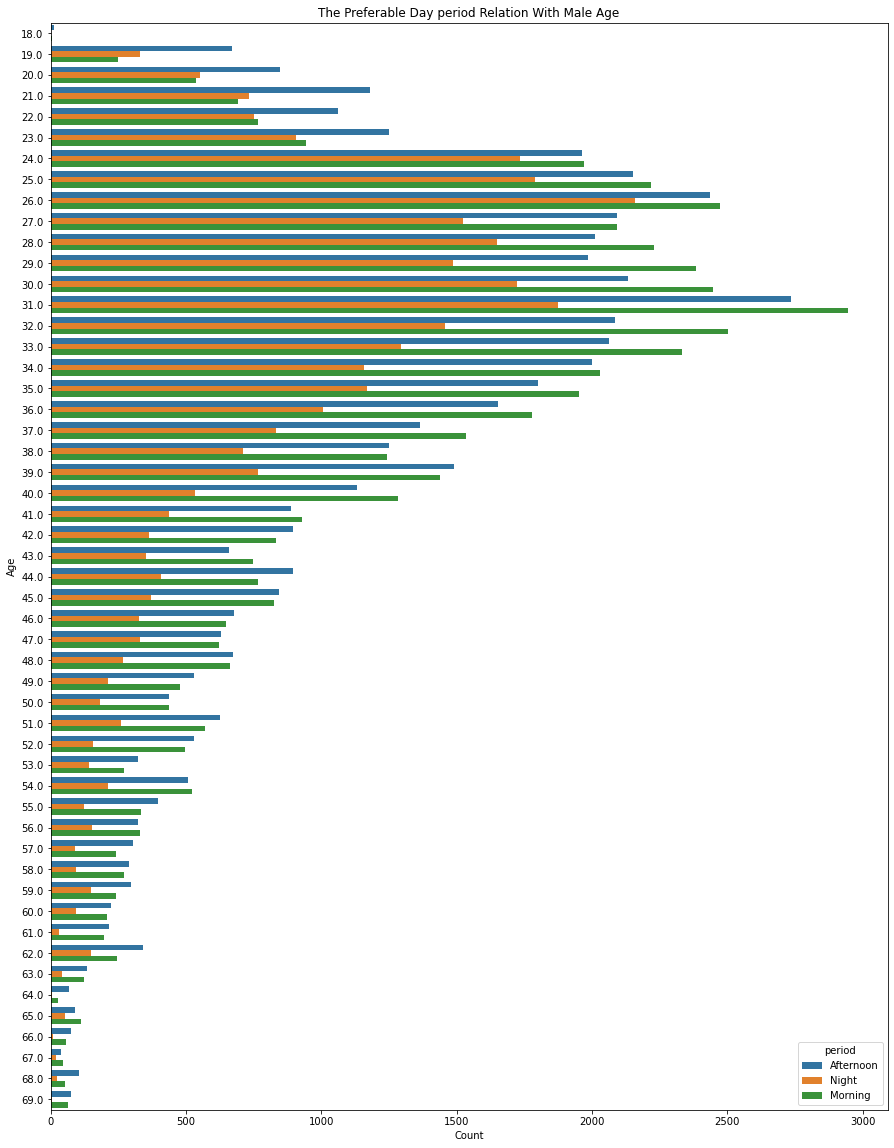

In [25]:
#Which day period is perefered for different ages
#create dataframes for each gender
df_f = df1.query('member_gender == "Female"')
df_m = df1.query('member_gender == "Male"')

plt.figure(figsize=(15,20))
sb.countplot(y="member_age", hue="period", data=df_f)
plt.xlabel('Count')
plt.ylabel('Age')
plt.title('The Preferable Day period Relation With Female Age')

plt.figure(figsize=(15,20))
sb.countplot(y="member_age", hue="period", data=df_m)
plt.xlabel('Count')
plt.ylabel('Age')
plt.title('The Preferable Day period Relation With Male Age')

Very intersting to find  that Preferable Day period for females with age over 24 is morning while females under 24 perfere riding in afternoon. also males seem to prefere afternoon and morning over night